<a href="https://colab.research.google.com/github/shirleyzz/cap5610_machineleanrning/blob/master/Assignment2/HW2_with_k_fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW2-with k-fold validation
compare it with the network1

## Loading the CIFAR10 data set

In [0]:
import keras 
import numpy as np
from random import seed
from random import randrange
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras.datasets import cifar10
import matplotlib.pyplot as plt

In [0]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

## Preprocessing

In [0]:
# train_images = train_images.reshape((50000, 32 * 32 * 3))
train_images = train_images.astype('float32') / 255
# test_images = test_images.reshape((10000, 32 * 32 * 3))
test_images = test_images.astype('float32') / 255
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels,num_classes)
test_labels = keras.utils.to_categorical(test_labels,num_classes)

#Implement K -fold validation

In [0]:
def k_fold_cross_split(data,data_label,folds):
  new_data = list(data)
  new_data_label = list(data_label)
  fold_size = int(data.shape[0]/folds)
  dataset_split = []
  dataset_split_label = []
  for i in range(folds):
    fold = []
    fold1 = []
    for j in range(fold_size):
      index = randrange(len(new_data))
      fold.append(new_data.pop(index))
      fold1.append(new_data_label.pop(index))
    dataset_split.append(fold)
    dataset_split_label.append(fold1) 
  return dataset_split, dataset_split_label
#split train data set into training and validation set, set folds = 5
seed(1)
num_folds = 5
folds_all, folds_all_label = k_fold_cross_split(train_images,train_labels, num_folds)

In [0]:
#network architecture 
network = Sequential()
network.add(Conv2D(32, (3, 3), padding='same',input_shape=train_images.shape[1:]))
network.add(Activation('softmax'))
network.add(Flatten())
network.add(Dense(512))
network.add(Activation('relu'))
network.add(Dropout(0.5))
network.add(Dense(10))
network.add(Activation('softmax'))
network.summary()
#compilation step
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
network.compile(optimizer=opt,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
#train the model
epochs = 10

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               16777728  
_________________________________________________________________
activation_23 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                5130      
__________

In [0]:
num_fold = list(range(5))
for i in range(5):
  training_images = np.empty((0,32,32,3))
  print(training_images.shape)
  training_labels = np.empty((0,10))
  valid_images = np.array(folds_all[i])
  valid_labels = np.array(folds_all_label[i])
  valid_index = [i]
  training_index = [x for x in num_fold if x not in valid_index]
  print(training_index)
  for j in training_index:
        training_images = np.append(training_images, folds_all[j],axis=0)
        training_labels = np.append(training_labels, folds_all_label[j],axis=0)
  print(training_images.shape)
  print(training_labels.shape)
  print(valid_images.shape)
  print(valid_labels.shape)
  history = network.fit(training_images, training_labels,
                     batch_size=128,
                     epochs=epochs,
                     validation_data=(valid_images, valid_labels),
                     shuffle=True)

(0, 32, 32, 3)
[1, 2, 3, 4]
(40000, 32, 32, 3)
(40000, 10)
(10000, 32, 32, 3)
(10000, 10)
Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 13s 324us/step - loss: 2.2865 - acc: 0.1264 - val_loss: 2.2441 - val_acc: 0.1792
Epoch 2/10
40000/40000 [==============================] - 12s 304us/step - loss: 2.2034 - acc: 0.1810 - val_loss: 2.1362 - val_acc: 0.2332
Epoch 3/10
40000/40000 [==============================] - 12s 304us/step - loss: 2.1259 - acc: 0.2164 - val_loss: 2.0565 - val_acc: 0.2850
Epoch 4/10
40000/40000 [==============================] - 12s 302us/step - loss: 2.0650 - acc: 0.2407 - val_loss: 1.9988 - val_acc: 0.2961
Epoch 5/10
40000/40000 [==============================] - 12s 303us/step - loss: 2.0202 - acc: 0.2630 - val_loss: 1.9552 - val_acc: 0.3035
Epoch 6/10
40000/40000 [==============================] - 12s 303us/step - loss: 1.9931 - acc: 0.2782 - val_loss: 1.9350 - val_acc: 0.3113
Epoch 7/10
40000/40000 [==

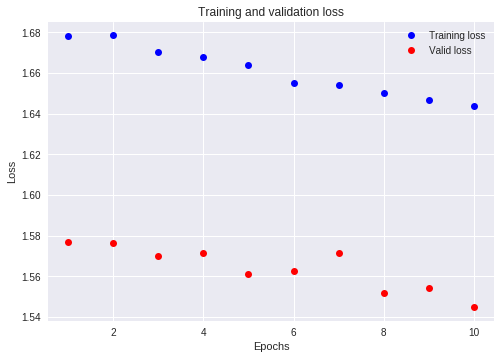

In [0]:
#display result
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Valid loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

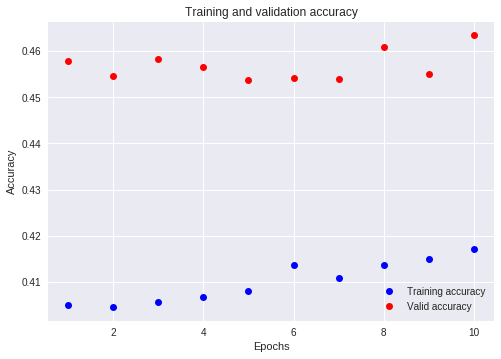

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Valid accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
scores = network.evaluate(test_images, test_labels)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 1s 134us/step
Test loss: 1.54427253074646
Test accuracy: 0.4622


## Conclusion

Compared with network1(the one not using k-fold validation), the accuracy is much higher on test set. The reason is I trained this one at 10 epochs and the test accuracy is 0.46, but on the original one, I trained 30 epochs, and get the same accuracy.